# ECE457A Assignment 2

**By: Logan Hartford**

**Due: 10/11/2024**

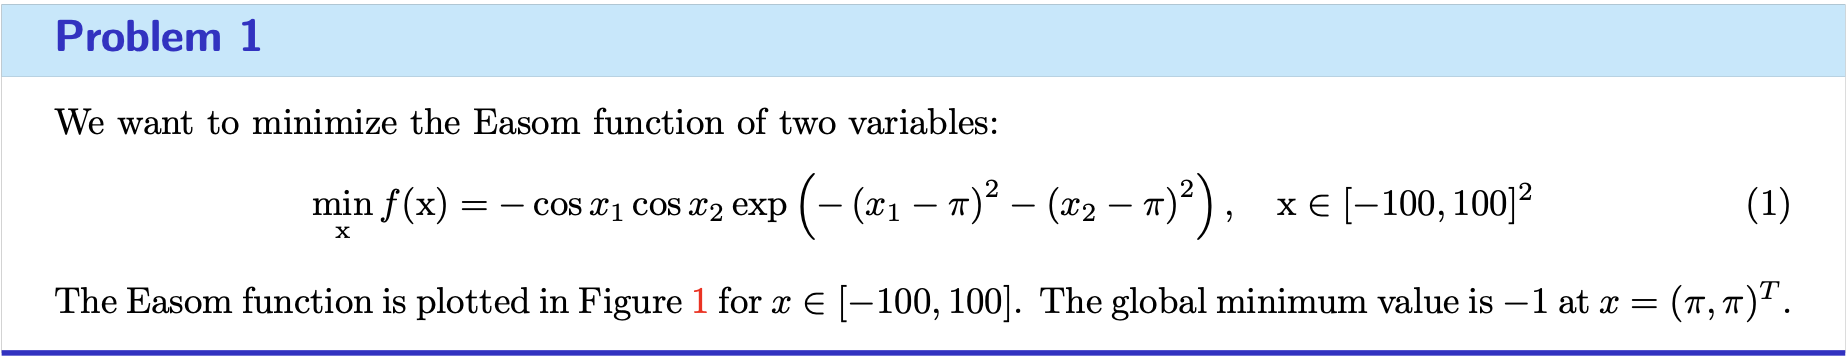

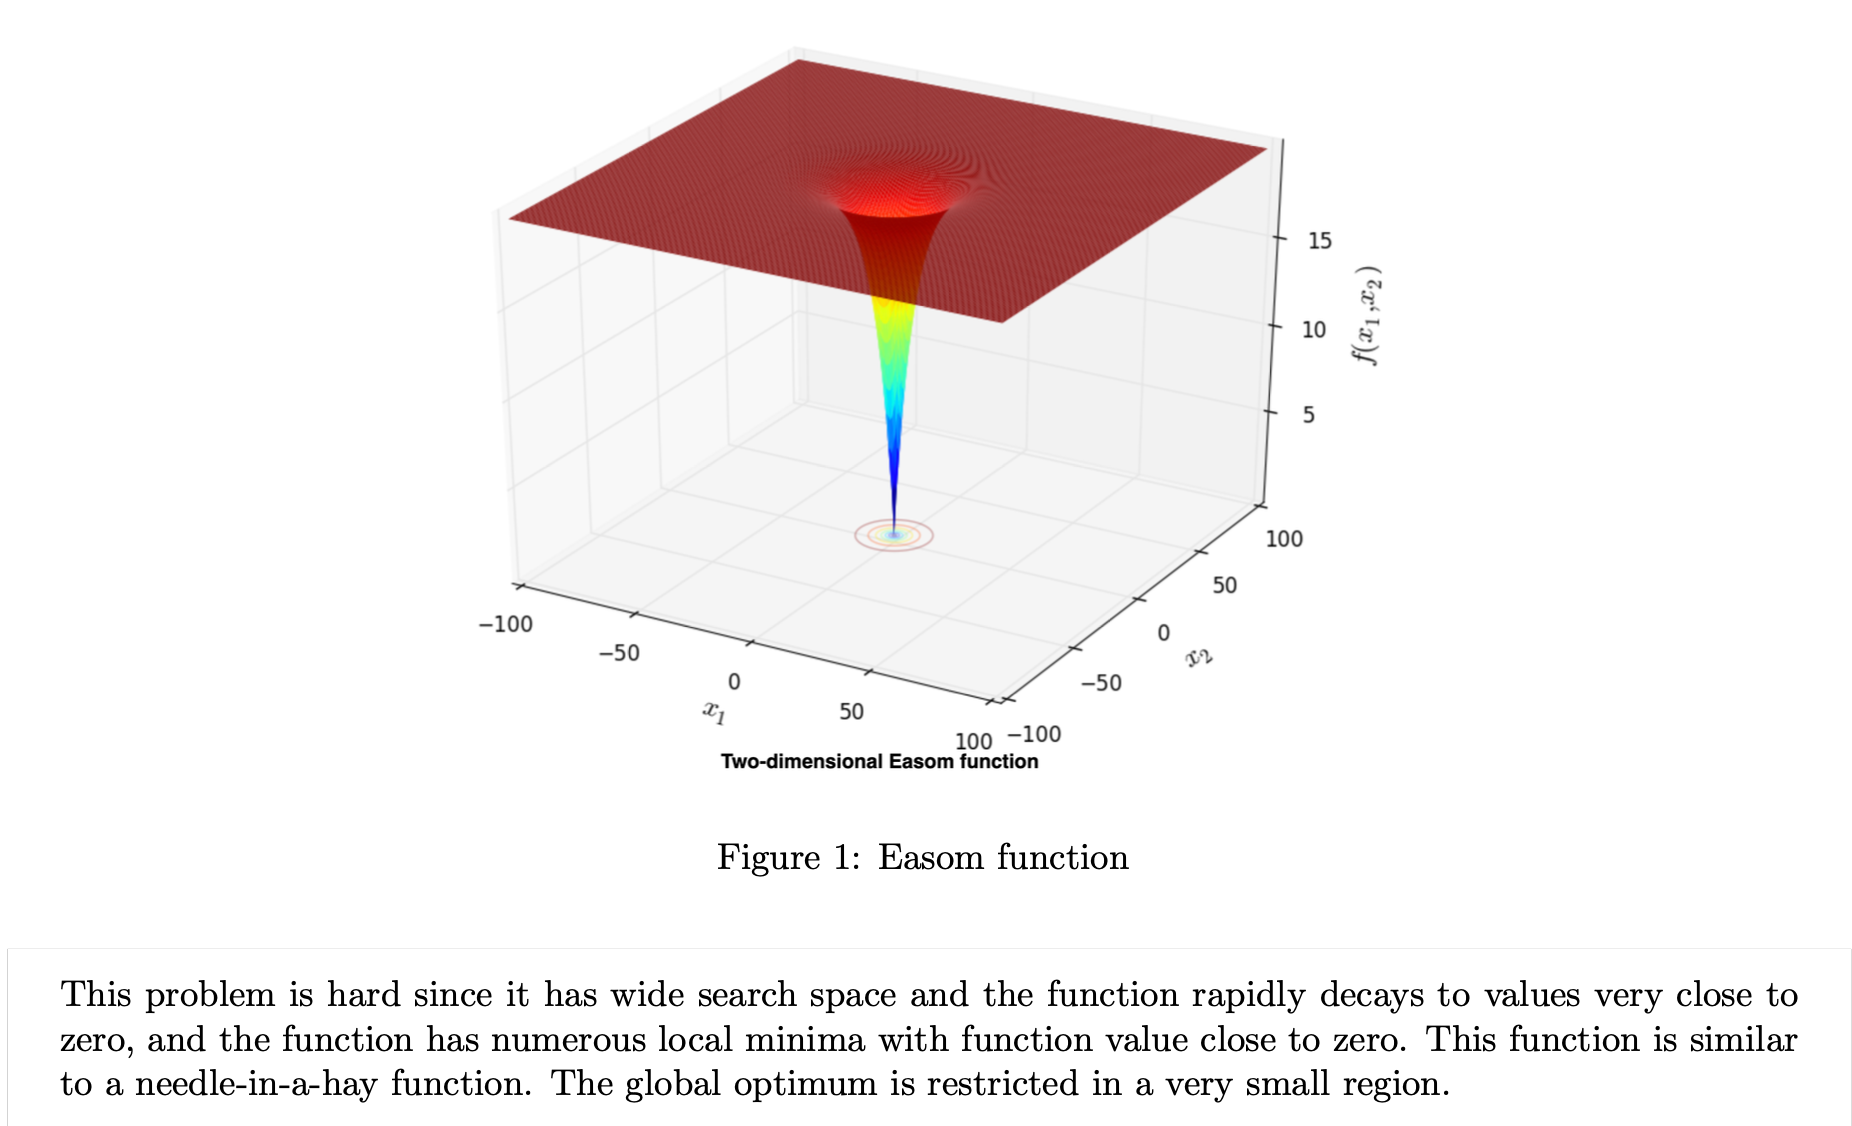

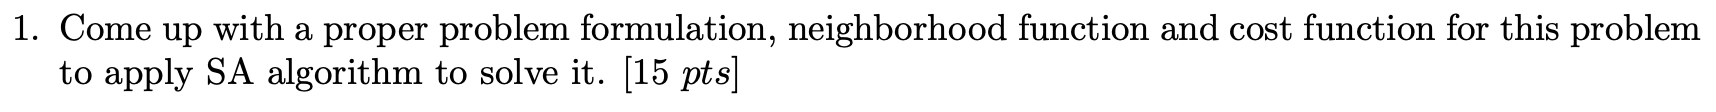

### 1.1 Problem Formulation

#### 1.1.1 Objective
- Minimize the Easom function.

#### 1.1.2 Search Space
- The search space consists of all possible pairs of input values within the given range. 
- This means any combination of two values between -100 and 100 is a potential solution.

#### 1.1.3 Initial Solution
- Start with a randomly chosen pair of input values within the search space.

#### 1.1.4 Neighboorhood Definition
- A neighboring solution is found by slightly altering the current pair of input values.
- This adjustment is done by adding a small random change to each input. 
- The amount of change should decrease gradually as the solution progresses.

#### 1.1.5 Acceptance Criteria
- Compare neighbooring solution with current solution.
- If the new solution is better, accept it.
- If it is worse, accpet it based on a probability that decreases as the algorithm proceeds.

#### 1.1.6 Cooling Schedule
- Gradually reduce the temperature parameter over time. 
- The temperature starts high, allowing more frequent acceptance of worse solutions to escape local minima.
- Then decreases progressivly to make the algorithm more selective as it converges to a minimum.

#### 1.1.7 Stopping Criteria
- The temperature becomes very low, or
- A maximum number of iterations is reached, or 
- There is no noticeable improvement in the function value over a set number of iterations.

#### 1.1.8 Evaluation and Output
- Track the best solution found throughout the optimization process.
- Evaluate the performance of the algorithm with different parameter settings.

### 1.2 Neighborhood Function
- Generates new candidates by making small random changes to the current inputs.
- The small random changes are often taken from Guassian distribution with mean 0 or a uniform distribution.

### 1.3 Cost Function
- The cost function evaluates the quality of a state.
- In this case, the only measure of quality it the value of the function at a state.
- The cost function is therefore, the function itself.

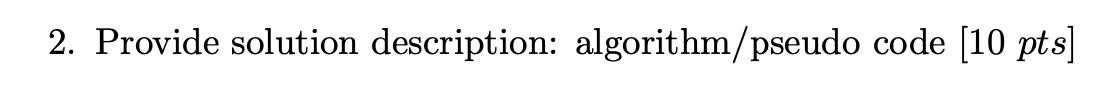

### 1.2 Pseudo Code

#### Algorithm: Simulated Annealing for Minimizing Easom Function

**Input:**  
Initial solution `(x1, x2)`, initial temperature `T`, cooling rate `alpha`,  
minimum temperature `Tmin`, maximum iterations `max_iter`

**Output:**  
Best solution found `(x1_best, x2_best)` and its function value `f_best`

1. Initialize `(x1_current, x2_current)` with a random point in `[-100, 100]^2`
2. Set `x1_best`, `x2_best` to `x1_current`, `x2_current`
3. Compute `f_current = Easom(x1_current, x2_current)`
4. Set `f_best = f_current`
5. While `T > Tmin`:
    
    a. For `i = 1` to `max_iter`:
        
    i.   Generate new potential solution `(x1_new, x2_new)` by adding a small random change  
            to `(x1_current, x2_current)`  
            - `x1_new = x1_current + random change`  
            - `x2_new = x2_current + random change`

    ii.  Compute `f_new = Easom(x1_new, x2_new)`

    iii. If `f_new < f_current`:
            - Accept the new solution  
            - Set `(x1_current, x2_current) = (x1_new, x2_new)`  
            - Set `f_current = f_new`  
            Else:
            - Accept the new solution with probability `P = exp(-(f_new - f_current) / T)`  
                (generate a random number between 0 and 1; if it is less than `P`, accept the solution)

    iv.  If `f_current < f_best`:
            - Update the best solution: `(x1_best, x2_best) = (x1_current, x2_current)`  
            - Set `f_best = f_current`

    b. Reduce the temperature: `T = alpha * T`

6. Return `(x1_best, x2_best)` and `f_best`


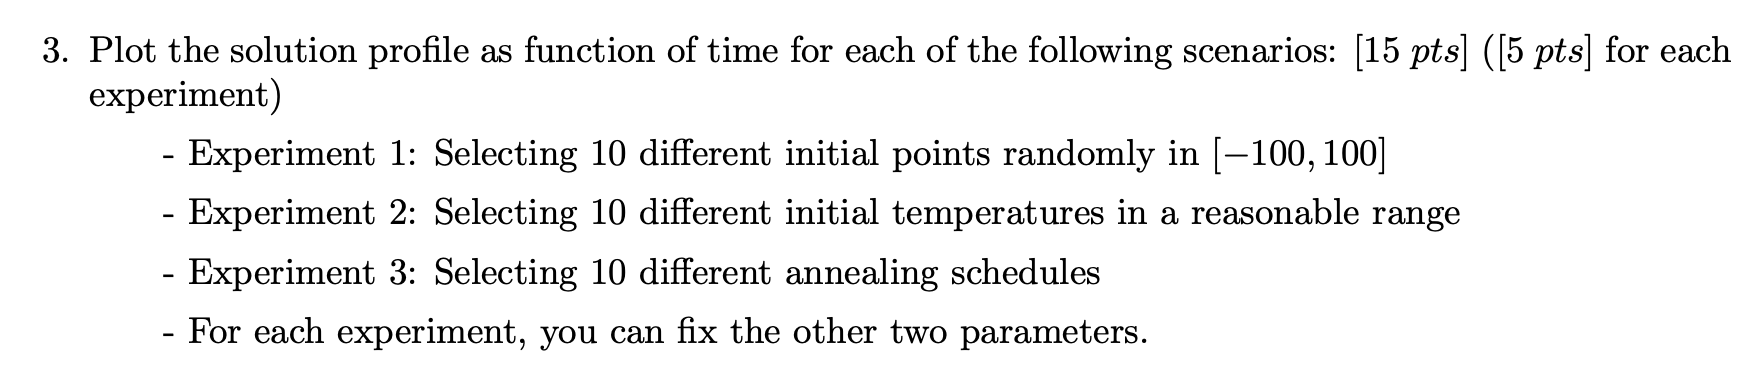

-1.0
-0.9415641575364946
-0.012779642669914994


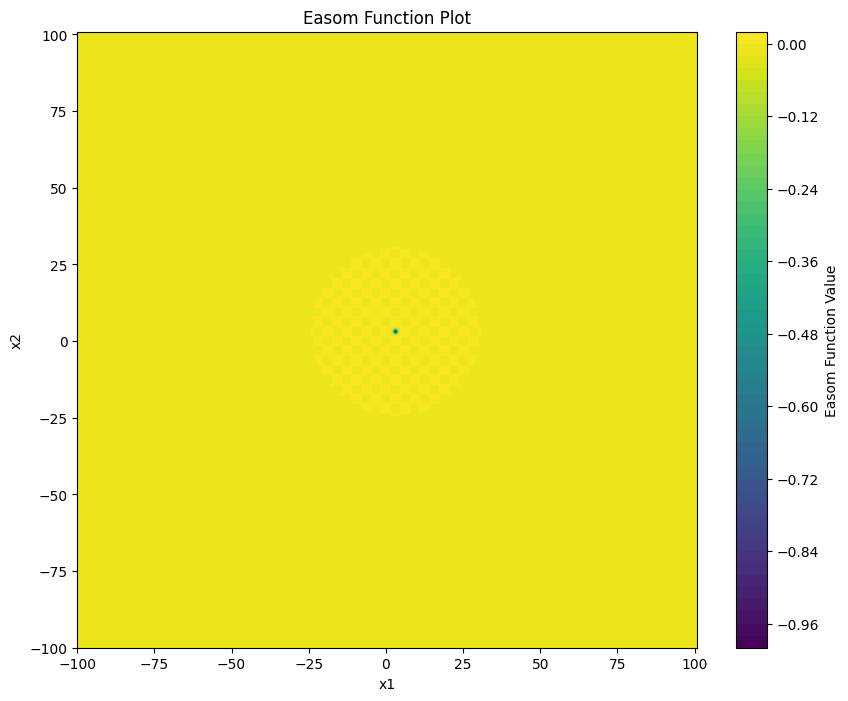

In [4]:
import numpy as np
from Q1 import easom, plot_easom_function

print(easom(np.pi, np.pi))
print(easom(3, 3))
print(easom(2, 2))

plot_easom_function()

In [8]:
# Testing simulated_annealing function
from Q1 import simulated_annealing
best, f_best, f_history = simulated_annealing((50, 50), 100, 0.99, 10000, 0.1, step_size=1)

49.00378277045559 50.753949334768144
Iteration 0, Best solution: -0.0
48.48335212373176 50.71628313328185
48.00211507444412 51.136419475947044
48.408468673656984 51.81590136174215
48.47254850865989 52.14179828882802
49.06610398299832 51.4929219277869
48.78729048838419 51.399011667235925
48.67443058560659 50.46816990980224
48.3293563587874 51.23779429551137
48.98043327651033 50.55296150173626
49.56490890485759 49.95304785758839
49.27948703776233 49.66658805755221
50.1596853563081 49.5329349847349
49.28497692144312 48.93552591205088
49.97933561721246 49.00271615227342
49.10925957339304 48.395529296413336
48.56302942276678 48.09052086096011
47.63963846093116 47.185491317776126
46.73060181869673 48.119855415100936
45.93479734221934 47.17483521614745
45.14203995956248 47.37212122413217
45.52977445645625 47.918467025354474
45.18455184228486 47.36952090293265
46.04158855999902 48.05537306121098
46.082749186916075 47.815422489114276
46.889162835109346 48.65603041808696
46.18689932339037 48.979

[-67.54354636  28.08225906]
-70.36357294943426 69.21598850848396
Iteration 0, Best solution: -0.0
-73.51368385230914 72.88857960015203
-74.92410835811668 73.05719056512291
-71.03673200550234 75.71666523846281
-72.9145357302517 79.43831221763108
-77.6787774528954 82.76991773012665
-78.09226206547726 79.05780233868735
-74.28308215427423 74.26407914531882
-75.53011648738037 75.73517490499725
-77.69595135392508 75.83504086166226
-77.22364759836931 73.89432000474052
-77.37982381172424 73.27739599959861
-80.32613988610143 78.20841438233299
-80.93360299029058 78.44494031528501
-78.5914596958658 82.27063351426526
-80.22776187988862 79.8172215674506
-85.01546709835834 82.90188034554936
-85.65661868240075 80.27239707502541
-82.57546337832225 84.57799134718707
-85.00509708481646 79.88608594156545
-89.95813673037821 77.98971207416899
-87.67362757751087 74.44136537329759
-89.00342911931432 75.90458617954889
-87.56647391013962 75.4707205179684
-83.77638267585758 79.5723336737254
-81.21272375679939 7

/Users/loganhartford/Documents/WaterlooEngineering/4A/ECE 457A/Assignments/ece457a_a2/src/Q1.py:39: RuntimeWarning: overflow encountered in exp
  metropolis = np.exp(-(diff) / T)


-78.0946595733771 -14.096098289453513
-77.38704030380849 -13.160651436419565
-78.79852978779138 -13.469253033194057
-83.1367849413339 -10.267926154234427
-83.53401900710357 -6.208532518804308
-85.38610366394951 -7.050369236964162
-86.69016528170813 -2.6945789814593635
-82.97618474944544 0.6387835636244503
-85.78608002093232 -0.6354130481446827
-89.28442068207487 0.27977848268955885
-91.26006428617686 3.432820625400084
-86.71321214754843 -0.9671452988005278
-83.57362028614922 2.808591518336293
-87.59226221080908 4.525842153065259
-91.408624033743 2.1828460953627724
-95.38869233719099 0.6582547078936916
-99.49232836412381 3.0735559151396616
-97.50733880307091 -0.5307775921658533
-93.33155599105403 -1.3349653985701404
-89.55576236669839 1.4870577981001118
-87.78515457405558 1.603484117581655
-88.66810367407551 1.16669491127506
-86.60432715023634 0.04499092086765222
-83.99338159204267 4.68094806489616
-80.45980057682563 5.038651032485347
-83.55563372239419 1.0586006773223025
-81.5163011927

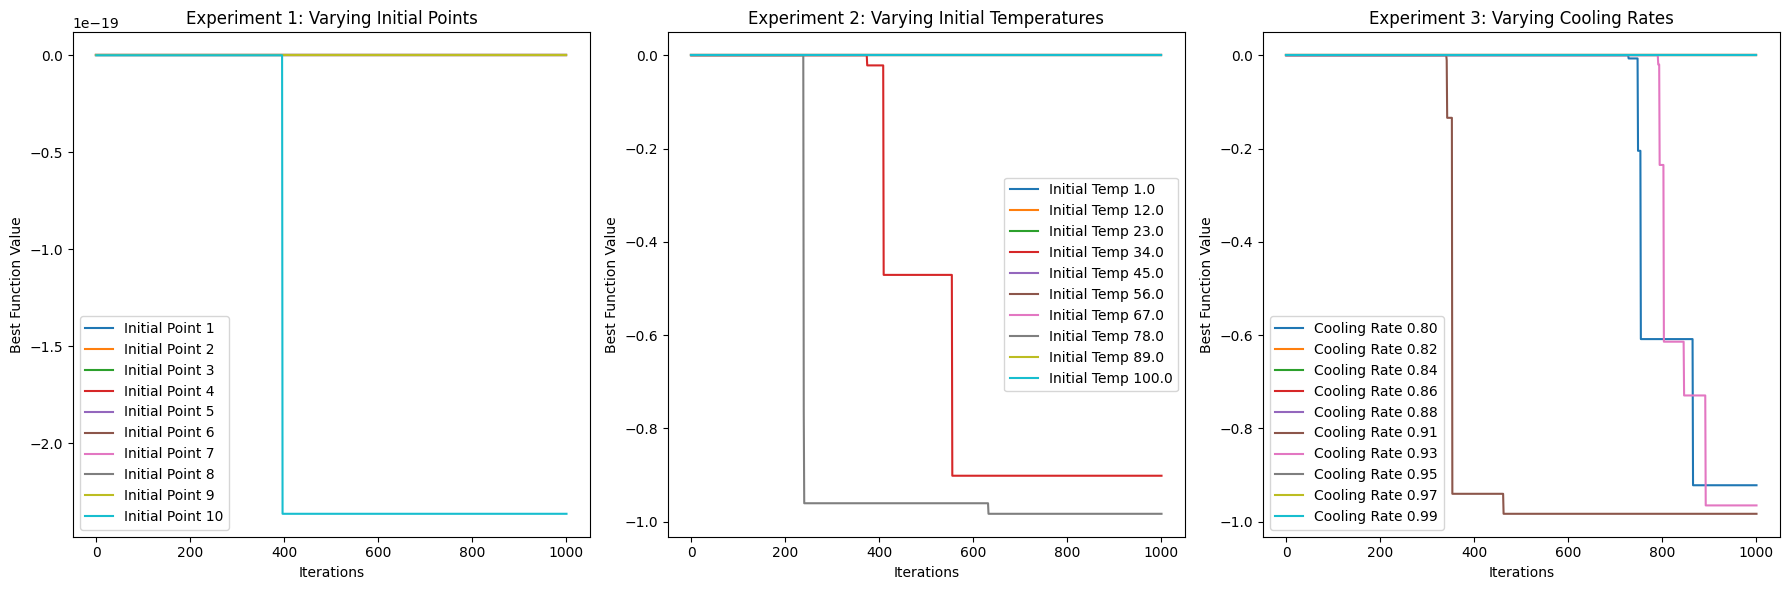

In [6]:
import matplotlib.pyplot as plt

# Parameters for experiments
initial_points = [np.random.uniform(-100, 100, 2) for _ in range(10)]
initial_temperatures = np.linspace(1, 100, 10)
cooling_rates = np.linspace(0.8, 0.99, 10)
min_temp = 1e-14
max_iter = 1000
best_temp = 1
best_cr = 0.95
rand_start = np.random.uniform(-100, 100, 2)
print(rand_start)


# Experiment 1: Varying initial points
experiment1_results = []
for point in initial_points:
    _, _, f_history = simulated_annealing(point, best_temp, best_cr, max_iter, min_temp)
    experiment1_results.append(f_history)

# Experiment 2: Varying initial temperatures
experiment2_results = []
for temp in initial_temperatures:
    _, _, f_history = simulated_annealing(rand_start, temp, best_cr, max_iter, min_temp)
    experiment2_results.append(f_history)

# Experiment 3: Varying cooling rates
experiment3_results = []
for rate in cooling_rates:
    _, _, f_history = simulated_annealing(rand_start, best_temp, rate, max_iter, min_temp)
    experiment3_results.append(f_history)

# Plotting results for each experiment
plt.figure(figsize=(18, 6))

# Plot for Experiment 1
plt.subplot(1, 3, 1)
for i, f_history in enumerate(experiment1_results):
    plt.plot(f_history, label=f'Initial Point {i+1}')
plt.title('Experiment 1: Varying Initial Points')
plt.xlabel('Iterations')
plt.ylabel('Best Function Value')
plt.legend()

# Plot for Experiment 2
plt.subplot(1, 3, 2)
for i, f_history in enumerate(experiment2_results):
    plt.plot(f_history, label=f'Initial Temp {initial_temperatures[i]:.1f}')
plt.title('Experiment 2: Varying Initial Temperatures')
plt.xlabel('Iterations')
plt.ylabel('Best Function Value')
plt.legend()

# Plot for Experiment 3
plt.subplot(1, 3, 3)
for i, f_history in enumerate(experiment3_results):
    plt.plot(f_history, label=f'Cooling Rate {cooling_rates[i]:.2f}')
plt.title('Experiment 3: Varying Cooling Rates')
plt.xlabel('Iterations')
plt.ylabel('Best Function Value')
plt.legend()

plt.tight_layout()
plt.show()

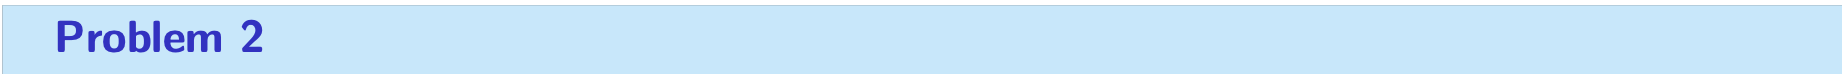

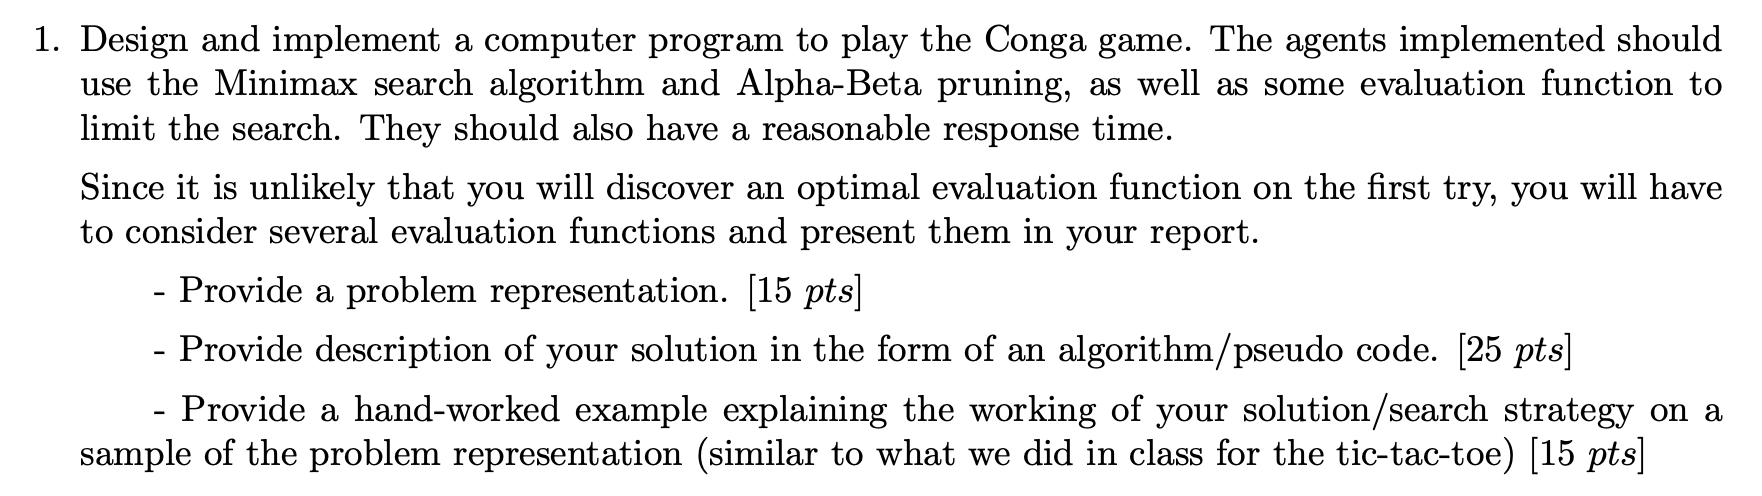

### 2.1 Problem Representation

#### 2.1.1 Objective
- Develop an agent that can play the Conga game rationally, aiming to block the opponent's stones so they have no legal moves.

#### 2.1.2 Search Space
- The search space consists of all possible valid game states.
- Each state is defined by the positions of the stones for both players on a 4x4 board.

#### 2.1.3 Initial Solution
- Player 1 has ten black stones in (1,4), and Player 2 has ten white stones in (4,1).

#### 2.1.4 Neighborhood Definition
- The neighboring states are defined by all possible valid moves for the current player.
- A valid move involves moving stones from one square to one or more adjacent squares, according to the game rules.

#### 2.1.5 Move Evaluation
- Use a Minimax algorithm with Alpha-Beta pruning to evaluate the potential outcomes of moves.
- The evaluation function estimates the quality of a game state for the current player.
- Possible evaluation criteria could include the number of stones in advantageous positions or the number of blocked opponent stones.

#### 2.1.6 Search Strategy
- Use a depth-limited Minimax search with Alpha-Beta pruning to explore possible game states.
- At each turn, select the move that maximizes the minimum score obtainable by the opponent.

#### 2.1.7 Stopping Criteria
- The game ends when one player has no legal moves left.

#### 2.1.8 Evaluation and Output
- Output the chosen move, the evaluation score of the move, and the number of nodes explored during the search.
- Measure the agent's performance by playing multiple games against a Random Agent.

### 2.1 Pseudo Code

#### Function Definitions
1. **Minimax(state, depth, alpha, beta, maximizingPlayer):**
    - **Input:**
        - `state`: Current board configuration.
        - `depth`: Current search depth.
        - `alpha`: The best score that the maximizing player can guarantee so far.
        - `beta`: The best score that the minimizing player can guarantee so far.
        - `maximizingPlayer`: Boolean indicating if the current player is the maximizing player.
    - **Output:**
        - The evaluation score for the current state.

    - **Base Case:**
        - If `depth` is 0 or the game is over (no legal moves for either player), return the evaluation of `state`.

    - **If maximizingPlayer is true:**
        - Set `maxEval = -∞`
        - For each valid move in `state`:
            - Apply the move to generate `newState`.
            - `eval = Minimax(newState, depth - 1, alpha, beta, false)`
            - `maxEval = max(maxEval, eval)`
            - `alpha = max(alpha, eval)`
            - If `beta ≤ alpha`, break (prune the search)
        - Return `maxEval`

    - **Else (minimizingPlayer is true):**
        - Set `minEval = ∞`
        - For each valid move in `state`:
            - Apply the move to generate `newState`.
            - `eval = Minimax(newState, depth - 1, alpha, beta, true)`
            - `minEval = min(minEval, eval)`
            - `beta = min(beta, eval)`
            - If `beta ≤ alpha`, break (prune the search)
        - Return `minEval`

2. **EvaluationFunction(state):**
    - Calculate a score for the given `state`.
    - Some things to try:
        - The number of legal moves available for the opponent.
        - The number of postions controlled by the agent minus the positions controlled by the opponent.
        - Difference is largest concentration of stones between the two players.
        - The total number of squares available for captures across valid moves.
        - Number of stones with valid moves.
    - Return the calculated score.

3. **GenerateLegalMoves(state, player):**
    - Given the current `state` and the `player`, generate a list of all valid moves according to the game rules.
    - Return the list of moves.

#### Main Algorithm

1. **Initialize:**
    - `currentState = initial board configuration`
    - `player = maximizingPlayer (e.g., Player 1)`

2. **Game Loop:**
    - While the game is not over (current player has valid moves):
        - If `player` is the maximizing player:
            - Set `bestMove = None`
            - Set `bestValue = -∞`
            - For each move in `GenerateLegalMoves(currentState, player)`:
                - Apply the move to generate `newState`.
                - `moveValue = Minimax(newState, searchDepth, -∞, ∞, false)`
                - If `moveValue > bestValue`:
                    - `bestValue = moveValue`
                    - `bestMove = move`
            - Update `currentState` with `bestMove`.
        - Else (minimizing player):
            - Follow the same procedure, but minimize the `moveValue`.

        - Switch `player` to the other player.
    
3. **End of Game:**
    - Output the result of the game (winner, final board configuration, number of turns taken).


### 2.1 Hand Worked Example

#### Initial Conditions
- Player1 is Maximizing player.
- Player1 starts.
- Depth = 2
- Start of game.

#### Evaluation Function
- Number of valid moves for Player1, minus number of valid moves for Player2

#### MinMax Tree
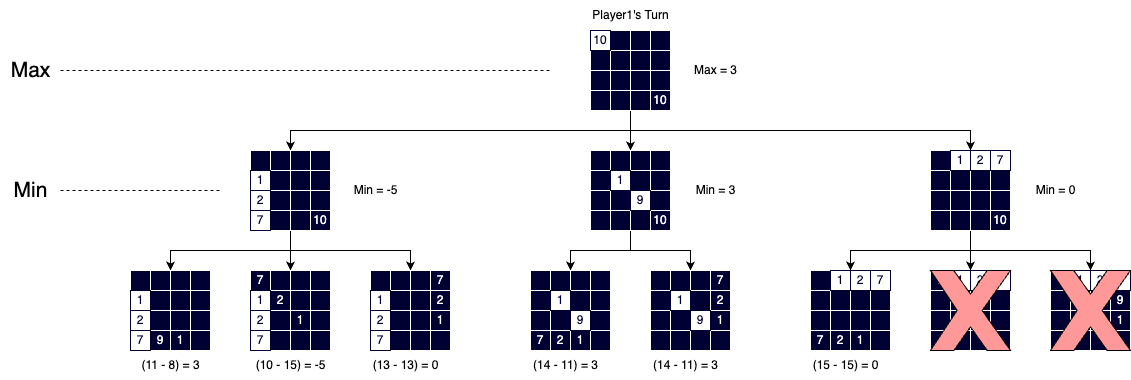

- In this case Player1's first move would be to move diagonally.
- The two right most nodes are never explored becasue they are pruned.
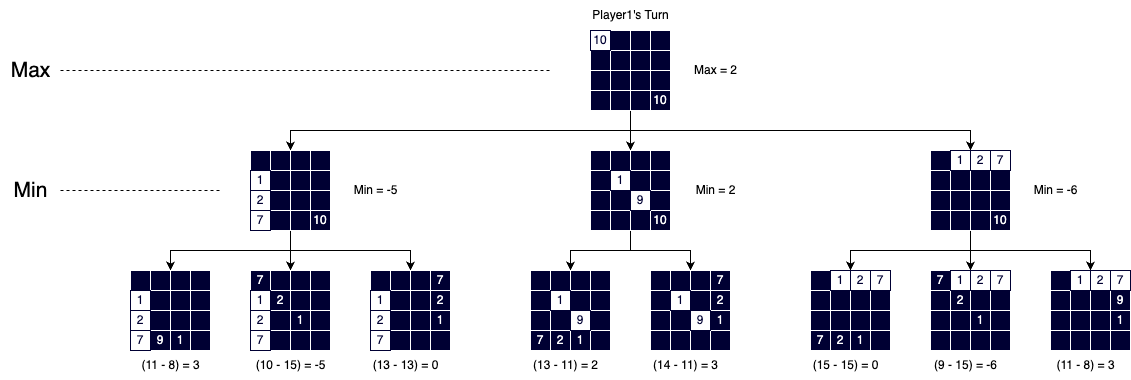

### 2.1 Building out The Game

In [10]:
# Creating the game board
from Q2 import *

board = create_board()
print(board)

[[ 10   0   0   0]
 [  0   0   0   0]
 [  0   0   0   0]
 [  0   0   0 -10]]


In [11]:
# Testing generate_moves function
board = np.array([
        [10, 0, 0, 0],
        [0, -9, 0, 0],
        [0, 0, -1, 0],
        [0, 0, 0, 0],
        ])
player = 1  # Player 1's turn
moves = generate_moves(board, player)
print("Possible moves for Player 1:")
for move in moves:
    print(f"Start: {move[0]}, Direction: {move[1]}")

player = -1  # Player 2's turn
moves = generate_moves(board, player)
print("\nPossible moves for Player 2:")
for move in moves:
    print(f"Start: {move[0]}, Direction: {move[1]}")

Possible moves for Player 1:
Start: (0, 0), Direction: (1, 0)
Start: (0, 0), Direction: (0, 1)

Possible moves for Player 2:
Start: (1, 1), Direction: (-1, 0)
Start: (1, 1), Direction: (1, 0)
Start: (1, 1), Direction: (0, -1)
Start: (1, 1), Direction: (0, 1)
Start: (1, 1), Direction: (-1, 1)
Start: (1, 1), Direction: (1, -1)
Start: (1, 1), Direction: (1, 1)
Start: (2, 2), Direction: (-1, 0)
Start: (2, 2), Direction: (1, 0)
Start: (2, 2), Direction: (0, -1)
Start: (2, 2), Direction: (0, 1)
Start: (2, 2), Direction: (-1, -1)
Start: (2, 2), Direction: (-1, 1)
Start: (2, 2), Direction: (1, -1)
Start: (2, 2), Direction: (1, 1)


In [12]:
# Testing apply_move function
board = create_board()

move = ((0, 0), (0, 1))  # Move to the right
player = 1  # Player 1's turn
new_board = apply_move(board, move, player)
print("New board state after applying the move:")
print(new_board)

move = ((3, 3), (-1, 0)) # Move up
player = -1  # Player 2's turn
new_board = apply_move(new_board, move, player)
print("New board state after applying the move:")
print(new_board)

move = ((0, 2), (1, 0)) # Move down
player = 1  # Player 2's turn
new_board = apply_move(new_board, move, player)
print("New board state after applying the move:")
print(new_board)

New board state after applying the move:
[[  0   1   2   7]
 [  0   0   0   0]
 [  0   0   0   0]
 [  0   0   0 -10]]
New board state after applying the move:
[[ 0  1  2  7]
 [ 0  0  0 -9]
 [ 0  0  0 -1]
 [ 0  0  0  0]]
New board state after applying the move:
[[ 0  1  0  7]
 [ 0  0  1 -9]
 [ 0  0  1 -1]
 [ 0  0  0  0]]


In [13]:
# Testing minimax function
board = create_board()
depth = 2
alpha = float('-inf')
beta = float('inf')
maximizingPlayer = True

# Pass the custom evaluation function to minimax
score = minimax(board, depth, alpha, beta, maximizingPlayer, eval_move_delta)
print("Minimax evaluation score:", score)

Minimax evaluation score: 3


In [16]:
# Testing play_game function
for i in range(3):
    initial_board = create_board()
    game_depth = 3  # Depth of the minimax search
    final_board, turns = play_game(initial_board, game_depth, eval_move_delta, minimax_agent, do_nothing_agent, verbose=False)
    print("Final board state:")
    print(final_board)
    print(f"Turns: {turns}")

Player 2 has no legal moves. Player 1 wins!
Final board state:
[[  0   0   0   0]
 [  1   1   1   1]
 [  0   1   1   3]
 [  0   0   1 -10]]
Turns: 12
Player 2 has no legal moves. Player 1 wins!
Final board state:
[[  0   0   0   0]
 [  1   1   1   1]
 [  0   1   1   3]
 [  0   0   1 -10]]
Turns: 12
Player 2 has no legal moves. Player 1 wins!
Final board state:
[[  0   0   0   0]
 [  1   1   1   1]
 [  0   1   1   3]
 [  0   0   1 -10]]
Turns: 12


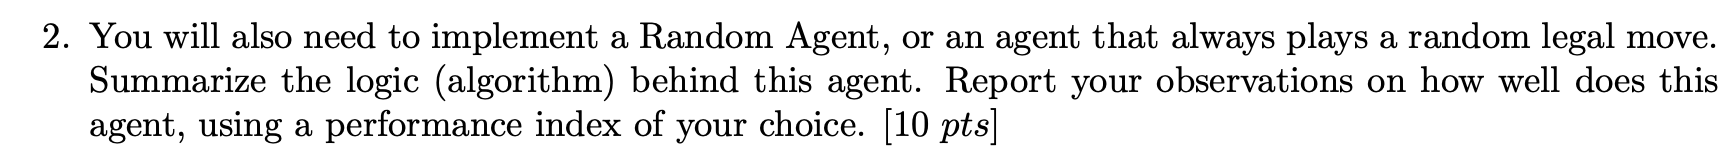

In [18]:
random_agent

<function Q2.random_agent(board, player, *args)>

### 2.2 Random Agent

#### 2.2.1 Logic
- The agent works by selecting a random move from the list of generated moves

### 2.2.2 Perfomance